In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.weightstats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest

sns.set()

In [56]:
avo_df = pd.read_csv('avocado.csv')
avo_df["Date"] = pd.to_datetime(avo_df.Date)
avo_df.columns = avo_df.columns.str.replace(" ", "_")

In [57]:
sd_temps = [65,76, 73, 69, 76, 75, 71, 69, 67, 66, 65, 65]
sf_temps = [66,67,64,63,62,60,57,68,70,69,63,57]
ny_temps = [39,42,50,60,71,79,85,83,76,65,54,44]
cgo_temps = [32,36,46,59,70,81, 84,82,75,63,48,36]
bos_temps = [36,39,45,56,66,76, 81,80,72,61,51,41]
nola_temps = [79,86,90,90,88,83,77,65,71,62,70,64]

In [58]:
temperatures_df = pd.DataFrame([sd_temps, sf_temps, ny_temps, cgo_temps, bos_temps, nola_temps]).T

In [59]:
temperatures_df.index = np.arange(1,13)
temperatures_df

,0,1,2,3,4,5
1,65,66,39,32,36,79
2,76,67,42,36,39,86
3,73,64,50,46,45,90
4,69,63,60,59,56,90
5,76,62,71,70,66,88
6,75,60,79,81,76,83
7,71,57,85,84,81,77
8,69,68,83,82,80,65
9,67,70,76,75,72,71
10,66,69,65,63,61,62


In [60]:
temperatures_df.columns = ["SanDiego", "SanFrancisco", "NewYork", "Chicago", "Boston", "NewOrleansMobile"]

In [61]:
temps_unstacked = temperatures_df.unstack().reset_index()
temps_unstacked

,level_0,level_1,0
0,SanDiego,1,65
1,SanDiego,2,76
2,SanDiego,3,73
3,SanDiego,4,69
4,SanDiego,5,76
...,...,...,...
67,NewOrleansMobile,8,65
68,NewOrleansMobile,9,71
69,NewOrleansMobile,10,62
70,NewOrleansMobile,11,70


In [62]:
temps_unstacked.columns=["region", "month", "temp"]

In [63]:
temps_unstacked

,region,month,temp
0,SanDiego,1,65
1,SanDiego,2,76
2,SanDiego,3,73
3,SanDiego,4,69
4,SanDiego,5,76
...,...,...,...
67,NewOrleansMobile,8,65
68,NewOrleansMobile,9,71
69,NewOrleansMobile,10,62
70,NewOrleansMobile,11,70


In [77]:
avo_2016 = avo_df.loc[avo_df.Date.dt.year==2016].loc[avo_df.type=="conventional"]

In [78]:
avo_2016["month"] = avo_2016.Date.dt.month
avo_2016 = avo_2016[["Date", "month", "AveragePrice", "Total_Volume", "region"]]

In [79]:
avo_2016

,Date,month,AveragePrice,Total_Volume,region
2808,2016-12-25,12,1.52,73341.73,Albany
2809,2016-12-18,12,1.53,68938.53,Albany
2810,2016-12-11,12,1.49,71777.85,Albany
2811,2016-12-04,12,1.48,113031.96,Albany
2812,2016-11-27,11,1.52,58171.89,Albany
...,...,...,...,...,...
5611,2016-01-31,1,0.79,788831.92,WestTexNewMexico
5612,2016-01-24,1,1.12,296402.96,WestTexNewMexico
5613,2016-01-17,1,0.83,712937.27,WestTexNewMexico
5614,2016-01-10,1,0.74,781036.73,WestTexNewMexico


In [80]:
joined = avo_2016.merge(temps_unstacked, on=["region", "month"], how="inner")

In [81]:
joined

,Date,month,AveragePrice,Total_Volume,region,temp
0,2016-12-25,12,1.28,447600.75,Boston,41
1,2016-12-18,12,1.09,579577.33,Boston,41
2,2016-12-11,12,1.22,510800.58,Boston,41
3,2016-12-04,12,1.26,473428.36,Boston,41
4,2016-11-27,11,1.45,391257.01,Boston,51
...,...,...,...,...,...,...
307,2016-01-31,1,1.27,805039.06,SanFrancisco,66
308,2016-01-24,1,1.05,844417.47,SanFrancisco,66
309,2016-01-17,1,1.24,732860.83,SanFrancisco,66
310,2016-01-10,1,1.21,765839.95,SanFrancisco,66


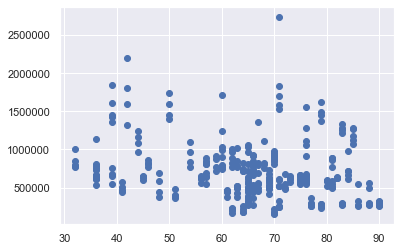

In [82]:
plt.scatter(joined.temp, joined.Total_Volume)

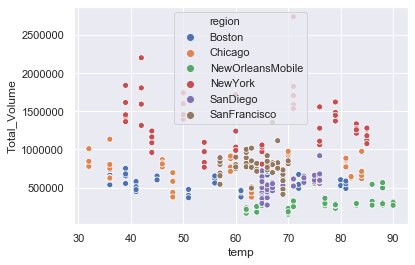

In [83]:
sns.scatterplot(data=joined, x="temp", y="Total_Volume", hue="region")

In [86]:
regions = joined.region.unique()
regions

array(['Boston', 'Chicago', 'NewOrleansMobile', 'NewYork', 'SanDiego',
       'SanFrancisco'], dtype=object)

Boston


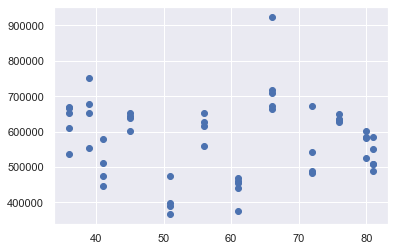

Chicago


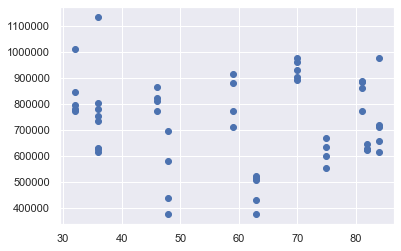

NewOrleansMobile


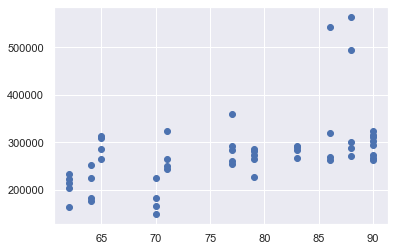

NewYork


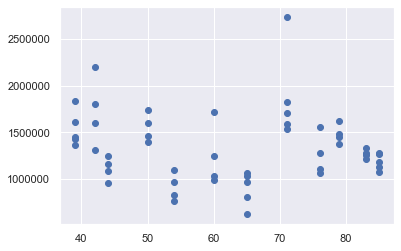

SanDiego


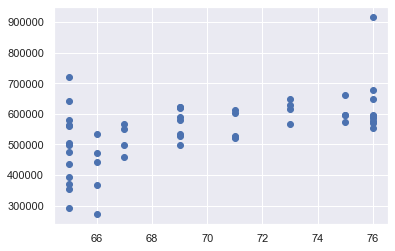

SanFrancisco


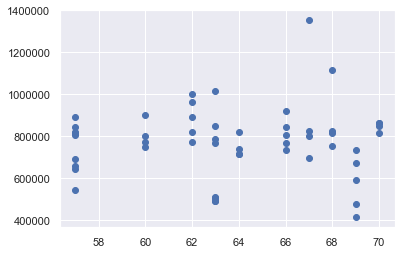

In [89]:
for r in regions:
    df = joined.loc[joined.region==r]
    plt.scatter(df.temp, df.Total_Volume)
    print(r)
    plt.show()

In [94]:
gb = joined.groupby(["region","month"]).agg({"Total_Volume":"mean", "AveragePrice":"mean", "temp":"mean"}).reset_index()
gb

,region,month,Total_Volume,AveragePrice,temp
0,Boston,1,626901.5800,1.0520,36
1,Boston,2,659279.8425,1.0625,39
2,Boston,3,634126.7250,1.0825,45
3,Boston,4,614085.0225,1.0625,56
4,Boston,5,737668.6120,1.0180,66
...,...,...,...,...,...
67,SanFrancisco,8,876538.4350,1.2950,68
68,SanFrancisco,9,846739.7750,1.4575,70
69,SanFrancisco,10,577084.4700,1.8800,69
70,SanFrancisco,11,499544.7575,1.9125,63


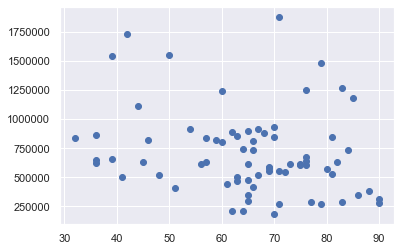

In [95]:
plt.scatter(gb.temp, gb.Total_Volume)

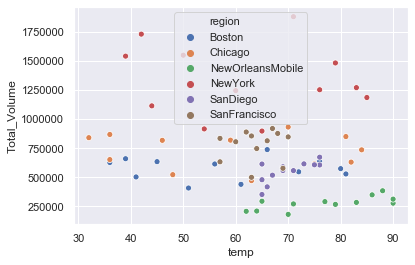

In [96]:
sns.scatterplot(data=gb, x="temp", y="Total_Volume", hue="region")

Boston


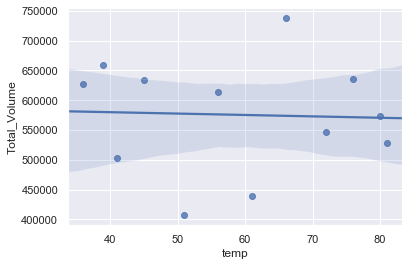

Chicago


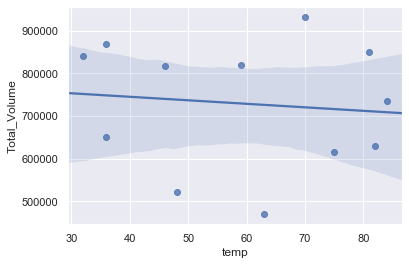

NewOrleansMobile


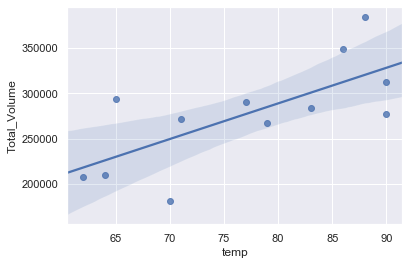

NewYork


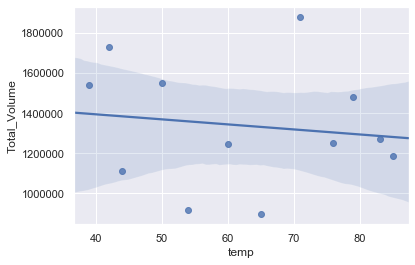

SanDiego


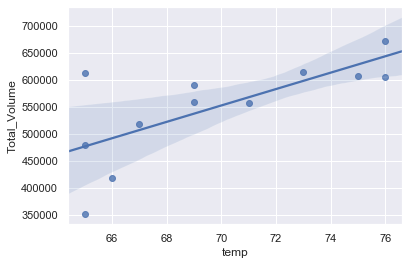

SanFrancisco


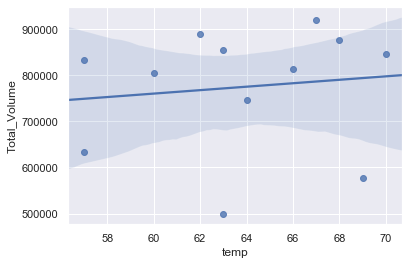

In [101]:
for r in regions:
    df = gb.loc[gb.region==r]
    sns.regplot(df.temp, df.Total_Volume)
    print(r)
    plt.show()
    

Boston


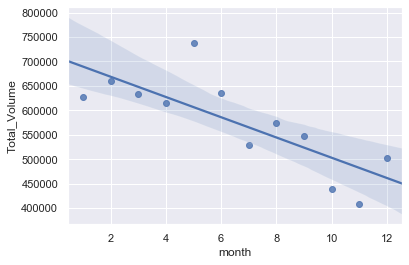

Chicago


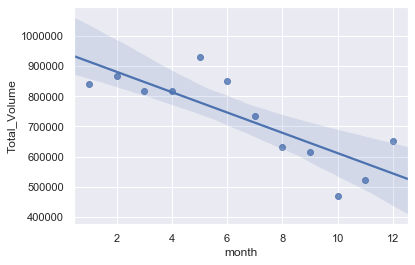

NewOrleansMobile


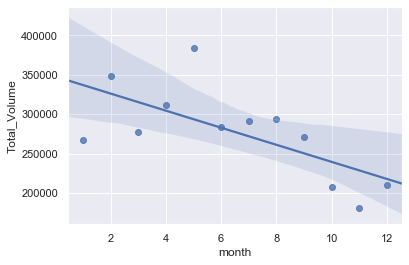

NewYork


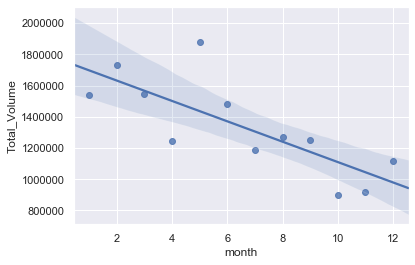

SanDiego


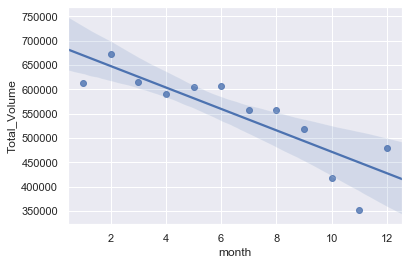

SanFrancisco


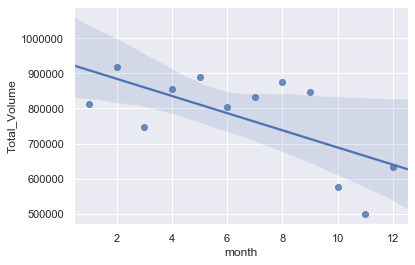

In [102]:
for r in regions:
    df = gb.loc[gb.region==r]
    sns.regplot(df.month, df.Total_Volume)
    print(r)
    plt.show()

/Users/caldermyers/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


TypeError: invalid type promotion

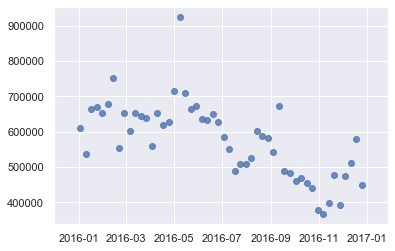

In [104]:
for r in regions:
    df = avo_2016.loc[avo_2016.region==r]
    sns.regplot(df.Date, df.Total_Volume)
    print(r)
    plt.show()

## t-tests

In [3]:
conv_df_total_us = conv_avo_df.loc[conv_avo_df["region"]=="TotalUS"]
conv_df_sd = conv_avo_df.loc[conv_avo_df["region"]=="SanDiego"]
conv_df_bos = conv_avo_df.loc[conv_avo_df["region"]=="Boston"]

Text(0.5, 0.98, 'Distribution of Total Volume of Avocados Sold, TotalUS region')

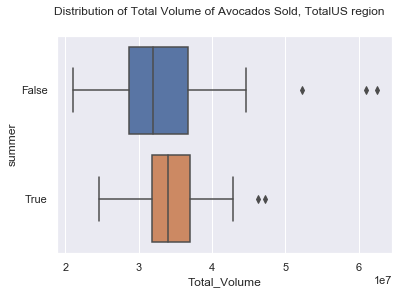

In [5]:
fig = plt.figure()
sns.boxplot(data=conv_df_total_us, x="Total_Volume", y="summer", orient="h")
fig.suptitle("Distribution of Total Volume of Avocados Sold, TotalUS region")

Text(0.5, 0.98, 'Distribution of Total Volume of Avocados Sold, Boston region')

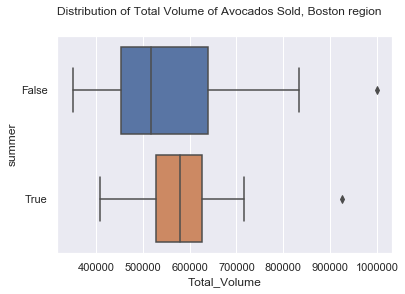

In [6]:
fig = plt.figure()
sns.boxplot(data=conv_df_bos, x="Total_Volume", y="summer", orient="h")
fig.suptitle("Distribution of Total Volume of Avocados Sold, Boston region")

Text(0.5, 0.98, 'Distribution of Total Volume of Avocados Sold, San Diego region')

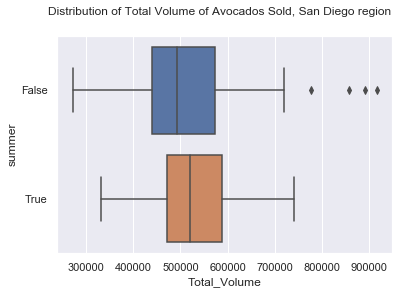

In [7]:
fig = plt.figure()
sns.boxplot(data=conv_df_sd, x="Total_Volume", y="summer", orient="h")
fig.suptitle("Distribution of Total Volume of Avocados Sold, San Diego region")

In [14]:
def split_series(df):
    summer_srs = df.loc[df["summer"]==True]["Total_Volume"]
    winter_srs = df.loc[df["summer"]==False]["Total_Volume"]
    return summer_srs, winter_srs

In [15]:
summer_total_us, winter_total_us = split_series(conv_df_total_us)
summer_sd, winter_sd = split_series(conv_df_sd)
summer_bos, winter_bos = split_series(conv_df_bos)


In [16]:
ttest_ind(summer_total_us, winter_total_us)

(1.4276534944621448, 0.15525890004664242, 167.0)

In [17]:
ttest_ind(summer_sd, winter_sd)

(0.9684679921020074, 0.3342111900895153, 167.0)

In [20]:
ttest_ind(summer_bos, winter_bos)

(2.024120246062124, 0.0445515014899775, 167.0)

In [21]:
ttest_ind(summer_bos, winter_bos, usevar='unequal')

(2.094401324271155, 0.03787023187829691, 153.21709184889517)

## z-tests

In [24]:
avo_sf_la_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 4 columns):
Date              104 non-null object
region            104 non-null object
Total_Vol_org     104 non-null float64
Total_Vol_conv    104 non-null float64
dtypes: float64(2), object(2)
memory usage: 3.4+ KB


In [25]:
avo_sf_la_2016.head()

,Date,region,Total_Vol_org,Total_Vol_conv
0,2016-12-25,LosAngeles,81458.10,2641775.31
1,2016-12-18,LosAngeles,75362.42,2377799.62
2,2016-12-11,LosAngeles,77692.93,2793917.73
3,2016-12-04,LosAngeles,68500.56,2780629.10
4,2016-11-27,LosAngeles,63734.67,2257271.18


In [27]:
sf_la_gb = avo_sf_la_2016.groupby("region").agg({"Total_Vol_org":"sum", "Total_Vol_conv":"sum"})
sf_la_gb

,Total_Vol_org,Total_Vol_conv
region,,
LosAngeles,4891080.72,1.582512e+08
SanFrancisco,1237904.51,4.029172e+07


In [28]:
sf_la_gb["Total_Vol_all"] = sf_la_gb["Total_Vol_org"] + sf_la_gb["Total_Vol_conv"]
sf_la_gb["prop_org"] = sf_la_gb["Total_Vol_org"] / sf_la_gb["Total_Vol_all"]

In [29]:
sf_la_gb

,Total_Vol_org,Total_Vol_conv,Total_Vol_all,prop_org
region,,,,
LosAngeles,4891080.72,1.582512e+08,1.631423e+08,0.029980
SanFrancisco,1237904.51,4.029172e+07,4.152963e+07,0.029808


In [30]:
2.998 - 2.9808

0.017200000000000326

In [31]:
proportions_ztest(sf_la_gb["Total_Vol_org"], sf_la_gb["Total_Vol_all"])

(5.830343262661636, 5.531347259060017e-09)